### Created by David Cruz 
### Github: dcruz083

### Project for Florida Atlantic University - CAP6673

### Finalized on Nov 1st 2023

In [24]:
# importing libraries

#used across notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading dataset
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Text(0.5, 1.0, 'Visualization of raw data')

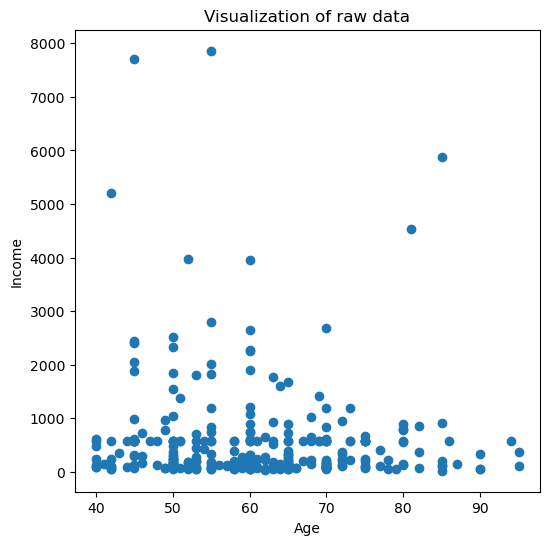

In [3]:
#visualizing the raw data
plt.figure(figsize = (6,6))
plt.scatter(data.iloc[:,0], data.iloc[:,2])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

# Task 1: Clustering Analysis
## 1.1. Apply K-Means clustering to the dataset using all features except 'DEATH_EVENT.'

In [58]:
#Task 1 libraries
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture

In [221]:
# Drop the 'DEATH_EVENT' column for clustering analysis
X = data.iloc[:,:-1]

# Standardize the features - data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Reducing data dimensionality using PCA - number of components = 2
pca = PCA(n_components=2)

#fitting the model with PCA data
X_pca = pca.fit_transform(X_scaled)

#applying KMeans clustering
#collecting Within-Cluster Sum of Square and Silhouette scores to find optimal number of clusters


wcss=[]
silhouette_avg=[]
n_range = range(2,18) #range for kmeans clustering

for i in (n_range):#applying KMeans clustering to dataset
    kmeans_pca = KMeans(n_clusters=i, random_state=0)
    kmeans_pca.fit_transform(X_pca)
    wcss.append(kmeans_pca.inertia_)
    silhouette_avg.append(silhouette_score(X_pca, kmeans_pca.labels_))

## 1.2. Determine the optimal number of clusters and visualize the clusters.

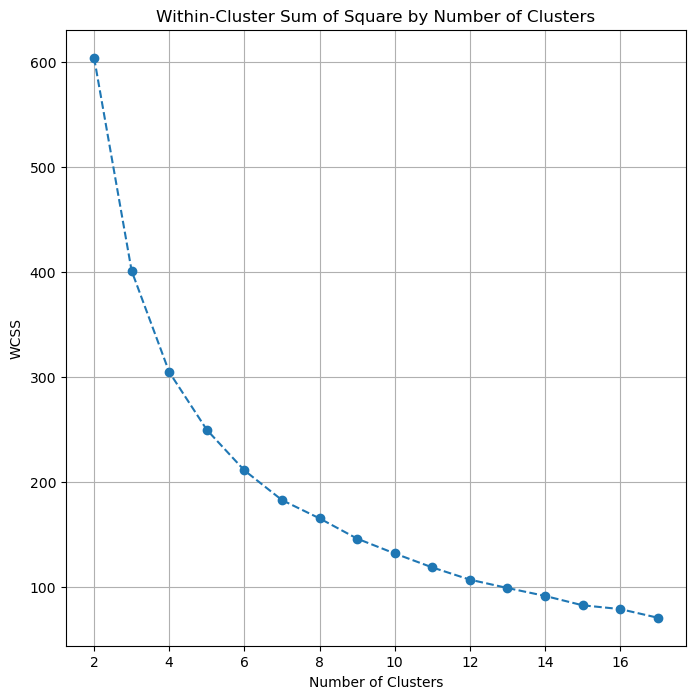

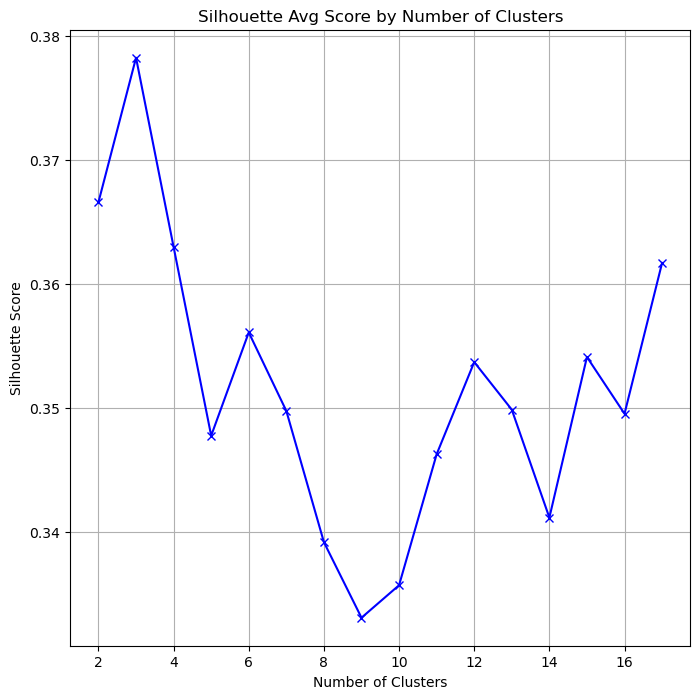

In [222]:
#plotting wcss scores
plt.figure(figsize = (8,8))
plt.plot(n_range, wcss, marker='o',linestyle ='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Within-Cluster Sum of Square by Number of Clusters')
plt.grid()
plt.show()

#plotting silouhette scores
plt.figure(figsize = (8,8))
plt.plot(n_range, silhouette_avg, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Avg Score by Number of Clusters')
plt.grid()
plt.show()

In [241]:
#Based on the elbow method and the silhouette method, the optimal number of clusters is 3
optimal_k=3
kmeans_pca = KMeans(optimal_k, random_state=0)

#fitting the data to k-means pca model
kmeans_pca.fit(X_pca)

KMeans(n_clusters=3, random_state=0)

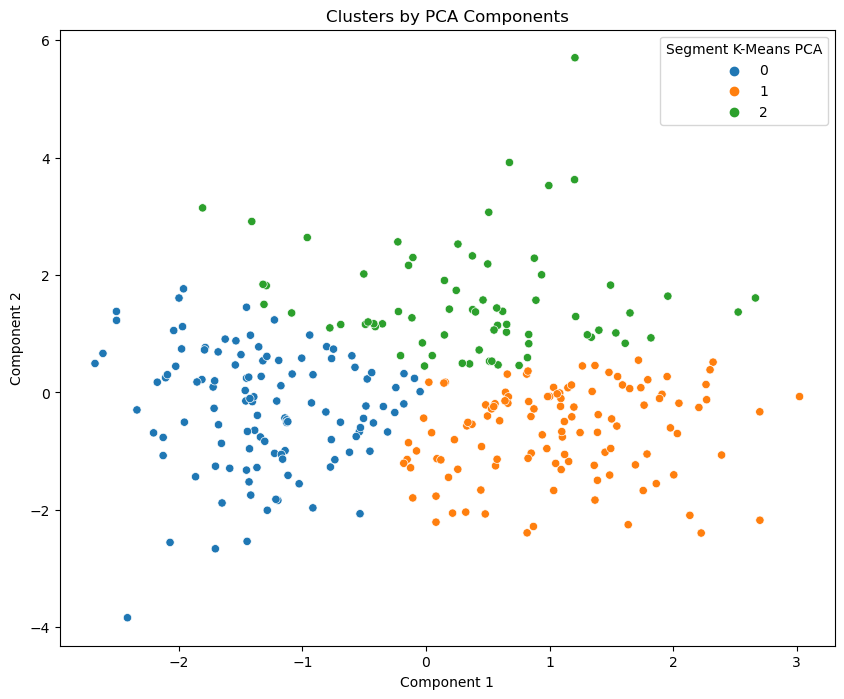

In [242]:
#plotting KMeans clustering
x_axis = segm_pca_kmeans['Component 1']
y_axis = segm_pca_kmeans['Component 2']
plt.figure(figsize = (10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue=segm_pca_kmeans['Segment K-Means PCA'], palette = 'tab10')
plt.title('Clusters by PCA Components')
plt.show()

In [243]:
#creating a new df with original feeature to add PCA Scores and assigned clusters
segm_pca_kmeans = pd.concat([data.reset_index(drop=True), pd.DataFrame(X_pca)], axis=1)
segm_pca_kmeans.columns.values[-2:] = ['Component 1','Component 2']
segm_pca_kmeans['Segment K-Means PCA'] = kmeans_pca.labels_
segm_pca_kmeans.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Component 1,Component 2,Segment K-Means PCA
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0.877055,2.287104,2
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,1.863753,-1.552894,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,2.526429,1.369821,2
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0.579566,1.143232,2
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,-0.960485,2.639384,2


## 1.2. Implement Kernel K-Means clustering with the same features and visualize the results.

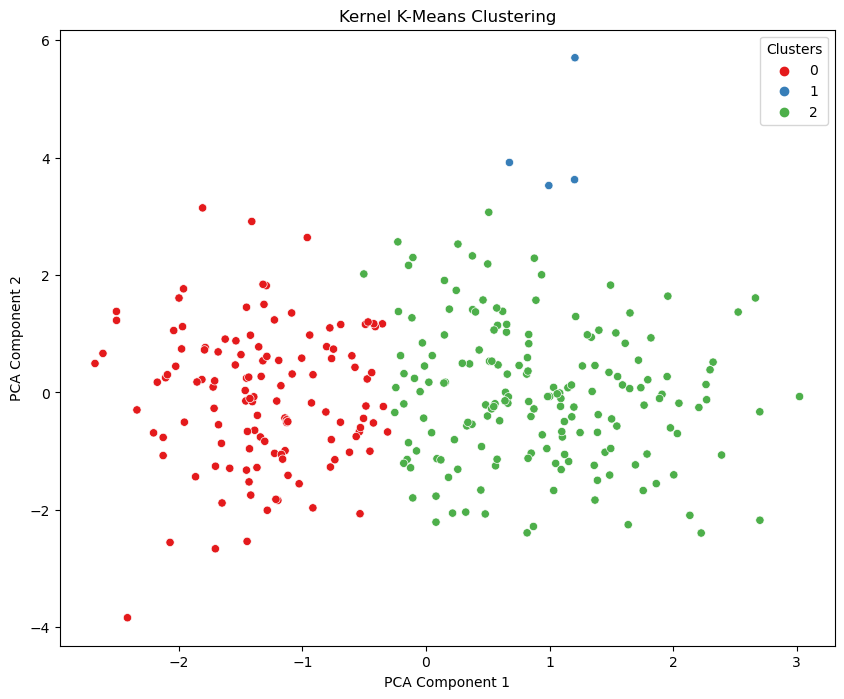

In [244]:
#initiating Kernel K-Means clustering using SpectralClustering
#kernel type = rbf
spectral = SpectralClustering(n_clusters=optimal_k, gamma=3, affinity='rbf', random_state=0)
labels_kernel_kmeans = spectral.fit_predict(X_pca)

#plotting Kernel K-Means
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kernel_kmeans, palette='Set1')
plt.title("Kernel K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Clusters")
plt.show()

In [245]:
#creating a new df with original feeature to add PCA Scores and assigned clusters
segm_pca_kernel_kmeans = pd.concat([data.reset_index(drop=True), pd.DataFrame(X_pca)], axis=1)
segm_pca_kernel_kmeans.columns.values[-2:] = ['Component 1','Component 2']
segm_pca_kernel_kmeans['Segment Kernel K-Means PCA'] = spectral.labels_
segm_pca_kernel_kmeans.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Component 1,Component 2,Segment Kernel K-Means PCA
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0.877055,2.287104,2
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,1.863753,-1.552894,2
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,2.526429,1.369821,2
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0.579566,1.143232,2
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,-0.960485,2.639384,0


## 1.4. Apply Expectation Maximization (EM) clustering.

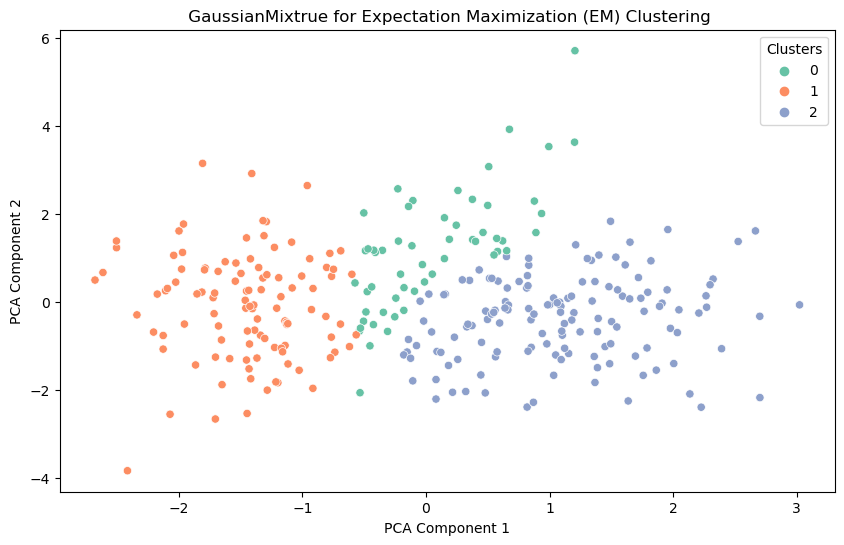

In [246]:
#initializing Gaussian Mixture for EM clustering
gmm = GaussianMixture(n_components=optimal_k, random_state=0)
labels_em = gmm.fit_predict(X_pca)

#plotting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_em, palette='Set2')
plt.title(" GaussianMixtrue for Expectation Maximization (EM) Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Clusters")
plt.show()

In [247]:
#creating a new df with original feeature to add PCA Scores and assigned clusters
segm_pca_em = pd.concat([data.reset_index(drop=True), pd.DataFrame(X_pca)], axis=1)
segm_pca_em.columns.values[-2:] = ['Component 1','Component 2']
segm_pca_em['Segment EM PCA'] = labels_em
segm_pca_em.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Component 1,Component 2,Segment EM PCA
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0.877055,2.287104,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,1.863753,-1.552894,2
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,2.526429,1.369821,2
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0.579566,1.143232,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,-0.960485,2.639384,1


## 1.5. Compare and contrast the clustering results from K-Means, Kernel K-Means, and EM.

In [248]:
# Comparing silhouette scores
silhouette_kmeans = silhouette_score(X_pca, kmeans_pca.labels_)
silhouette_kernel_kmeans = silhouette_score(X_pca, labels_kernel_kmeans)
silhouette_em = silhouette_score(X_pca, labels_em)

print(f"Silhouette Score for K-Means: {silhouette_kmeans}")
print(f"Silhouette Score for Kernel K-Means: {silhouette_kernel_kmeans}")
print(f"Silhouette Score for EM: {silhouette_em}")

Silhouette Score for K-Means: 0.3782531729240952
Silhouette Score for Kernel K-Means: 0.36349030138573635
Silhouette Score for EM: 0.3103033745235148


### In terms of cluster distribution and shape, k-means clustering tends to provide an even distribution among all three clusters with a spherical shape for all. On the other hand, kernel k-means clustering results in the smallest set being assigned to cluster '1,' while the shapes of clusters '0' and '2' still remain similar in size and shape. Meanwhile, EM clustering results in different shapes for each cluster. When comparing the assignments of each model, both k-means and kernel k-means assign cluster '0' to the leftmost side of the visualization, while EM assigns it in the middle with an oval shape. Cluster '1' is assigned to different locations in each model. All three models share the assignment of cluster ‘2’ to the right side of the graph. 

### When considering each model's silhouette scores, higher scores tends to indicate better-defined clusters. From all clustering models, K-means has a higher ranking than kernel k-means, with EM clustering coming in last.

## 1.6. Analyze the clinical significance of patient clusters in predicting 'DEATH_EVENT.'


In [249]:
#We can use mortality rate to showcase the clinical significance of patient clusters in relation to 'DEATH_EVENT'
#Mortality rate involves determining the proportion of individuals who experienced death within a given cluster. 

#function to calculate the mortality rate
#formula is mortality rate = number of deaths/total population 
def calculate_mortality_rates(data, cluster_column):
    # Get unique cluster values
    unique_clusters = sorted(data[cluster_column].unique())#getting unique clusters in df
    
    for cluster in unique_clusters:
        cluster_data = data.loc[data[cluster_column] == cluster]
        deaths_in_cluster = cluster_data.loc[cluster_data['DEATH_EVENT'] == 1]
        
        mortality_rate = len(deaths_in_cluster) / len(cluster_data)
        print(f"Mortality rate from cluster {cluster}: {mortality_rate:.2%}")

        
print("Mortality rates for K-Means Clusters")
calculate_mortality_rates(segm_pca_kmeans, 'Segment K-Means PCA')

print("\nMortality rates for Kernel K-Means Clusters")
calculate_mortality_rates(segm_pca_kernel_kmeans, 'Segment Kernel K-Means PCA')

print("\nMortality rates for EM Clusters")
calculate_mortality_rates(segm_pca_em, 'Segment EM PCA')

Mortality rates for K-Means Clusters
Mortality rate from cluster 0: 23.48%
Mortality rate from cluster 1: 18.42%
Mortality rate from cluster 2: 68.57%

Mortality rates for Kernel K-Means Clusters
Mortality rate from cluster 0: 28.46%
Mortality rate from cluster 1: 100.00%
Mortality rate from cluster 2: 33.14%

Mortality rates for EM Clusters
Mortality rate from cluster 0: 50.91%
Mortality rate from cluster 1: 28.30%
Mortality rate from cluster 2: 27.54%


### When analyzing the significance of clusters in predicting the occurrence of a ‘DEATH_EVENT, it is observed that different algorithm techniques provide varying mortality rates. The higher the rate, the more likely that cluster is to result in a death event. 

### In K-Means clustering, cluster ‘2’ has a mortality rate of 69%, while cluster ‘1’ has the lowest rate. This implies that the population in cluster ‘1’ is less likely to experience a death event. Cluster ‘0’ falls in between the other two. 

### For kernel k-means clustering, cluster ‘1’ yields a 100% mortality rate. This means that every patient with the same characteristics as those in this cluster is likely to experience a positive 'DEATH_EVENT'. However, the population in this cluster is limited to only 4 samples. Cluster ‘0’ has the lowest probability rate, while cluster ‘2’ falls in between, with a mortality rate of 33%. 

### In EM clustering, cluster ‘0’ has the highest mortality rate at 50%, implying that at least half of the patients in this cluster experience a 'DEATH_EVENT'. Cluster ‘1’ and ‘2’ have similar mortality rates of less than 30%. 

### Different techniques yield different clusterings with very distinct mortality rates. Therefore, it is important to take a deeper look at the clusters to understand the characteristics of the patients in each cluster and determine the best approach for predicting the occurrence of a 'DEATH_EVENT'.

# Task 2: Regression Analysis
## 2.1. Split the dataset into training and testing sets.

In [ ]:
#Task 2 libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [138]:
#splitting X(features) and Y(target) into separate df

X = data.iloc[:,:-1]#dropping DEATH_EVENT column from features
Y = data.iloc[:,-1]#saving DEATH_EVENT column as the Y depedent variable

#using a 75/25 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True)

## 2.2. Perform Linear Regression using relevant clinical features to predict 'DEATH_EVENT.'

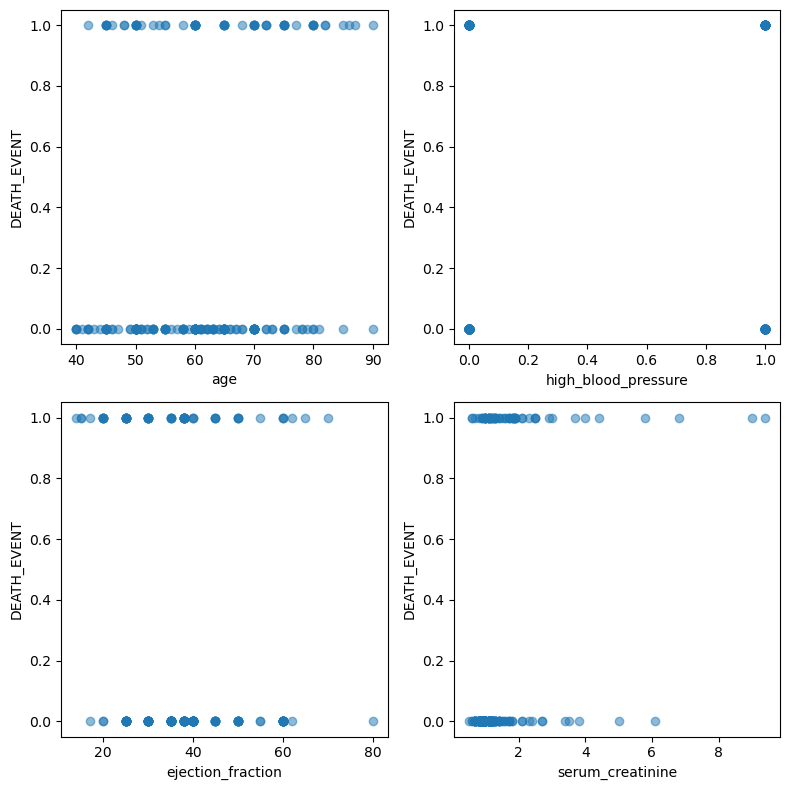

Mean Squared Error: 0.1647199776625871
Model's score: 0.30543487679756165

Coefficients: 0.005876321065093659
Intercept: 0.0323671915770502


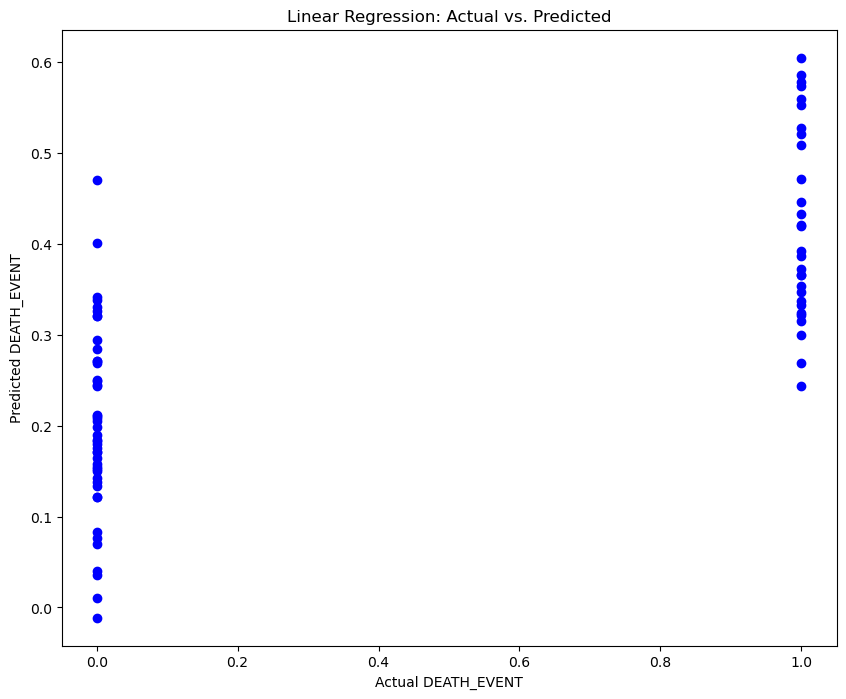

In [163]:
#selecting relevant features
#selecting age and high blood pressure as relevant clinical features
#as well as ejection fraction and serum creatinine based on previous ML studies
#https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5
features = ['age', 'high_blood_pressure','ejection_fraction','serum_creatinine']

# Creating a scatter plot for each selected feature against 'DEATH_EVENT'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
for i, feature in enumerate(features):
    ax = axes.flatten()[i]
    ax.scatter(X_train[feature], Y_train, alpha=0.5)
    ax.set_xlabel(feature)
    ax.set_ylabel('DEATH_EVENT')
plt.tight_layout()
plt.show()

X_train_selected = X_train[['age', 'high_blood_pressure','ejection_fraction','serum_creatinine']]
X_test_selected = X_test[['age', 'high_blood_pressure','ejection_fraction','serum_creatinine']]

#initializing linear regression model
linear_regr = LinearRegression()
linear_regr.fit(X_train_selected, Y_train)#fitting the model on train dataset

Y_pred_linear_regr = linear_regr.predict(X_test_selected)#testing the model with the testing dataset

# Evaluating the model
mse_linear = mean_squared_error(Y_test, Y_pred_linear_regr)
model_score_linear = linear_regr.score(X_test_selected, Y_test)

print(f"Mean Squared Error: {mse_linear}")
print(f"Model's score: {model_score_linear}")

# Coefficients and Intercept
coefficients = linear_regr.coef_[0]
intercept = linear_regr.intercept_

print(f"\nCoefficients: {coefficients}")
print(f"Intercept: {intercept}")

plt.figure(figsize=(10,8))
plt.scatter(Y_test, Y_pred_linear_regr, color='blue')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual DEATH_EVENT')
plt.ylabel('Predicted DEATH_EVENT')
plt.show()

## 2.3. Implement Ridge Regression with the same features.

Ridge Regression Train Score: 0.1446
Ridge Regression Test Score: 0.3014

Mean Squared Error: 0.16567945310682422
Model's score: 0.3013891126492605

Coefficients: 0.06573870823580794
Intercept: 0.29910714285714285


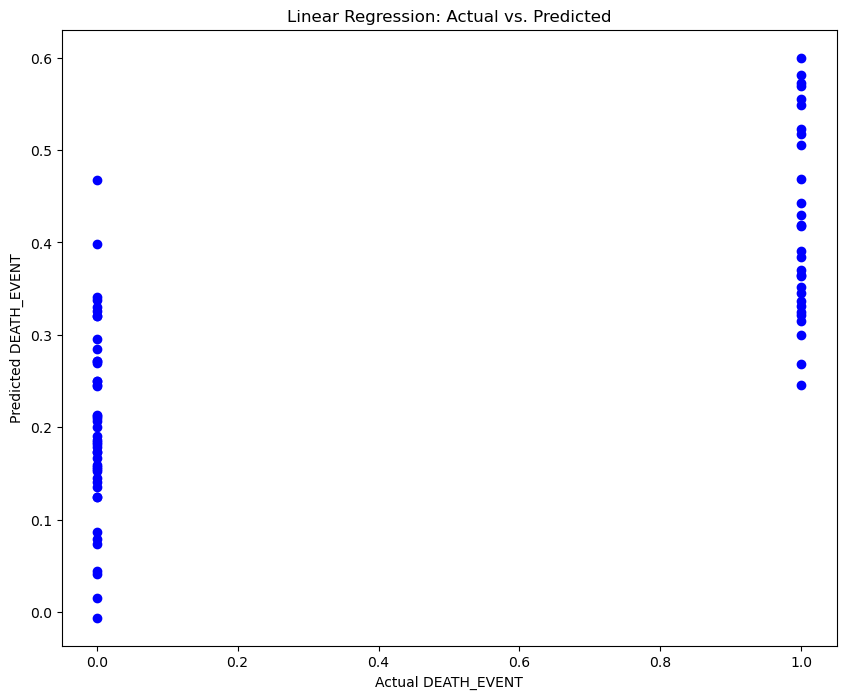

In [162]:
#initializing scaler using the same features as in linear regression
#X_train_selected and X_test_selected
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Initialize the Ridge Regression model
ridge_regr = Ridge(alpha=4.0)
ridge_regr.fit(X_train_scaled, Y_train)

# Evaluate the model
ridge_train_score = ridge_regr.score(X_train_scaled, Y_train)
ridge_test_score = ridge_regr.score(X_test_scaled, Y_test)
Y_pred_rr = ridge_regr.predict(X_test_scaled)#testing the model with the testing dataset


print(f'Ridge Regression Train Score: {ridge_train_score:.4f}')
print(f'Ridge Regression Test Score: {ridge_test_score:.4f}')

# Evaluating the model
mse_rr = mean_squared_error(Y_test, Y_pred_rr)
model_score_rr = ridge_regr.score(X_test_scaled, Y_test)

print(f"\nMean Squared Error: {mse_rr}")
print(f"Model's score: {model_score_rr}")

# Coefficients and Intercept
coefficients = ridge_regr.coef_[0]
intercept = ridge_regr.intercept_

print(f"\nCoefficients: {coefficients}")
print(f"Intercept: {intercept}")

plt.figure(figsize=(10,8))
plt.scatter(Y_test, Y_pred_rr, color='blue')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual DEATH_EVENT')
plt.ylabel('Predicted DEATH_EVENT')
plt.show()

## 2.4. Evaluate the performance of both models using appropriate regression metrics (e.g., Mean Squared Error).

(0.0, 1.0)

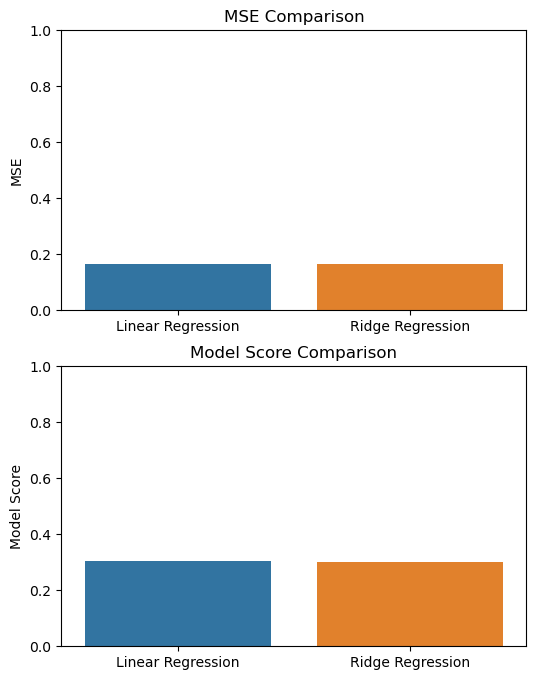

In [160]:
#creating object for models
models = ['Linear Regression', 'Ridge Regression']
mse = [mse_linear, mse_rr]
model_score = [model_score_linear, model_score_rr]

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

##plot MSE comparison
sns.barplot(x=models, y=mse, ax=ax1)
ax1.set_title('MSE Comparison')
ax1.set_ylabel('MSE')
ax1.set_ylim(0, 1)

#plotting Model score comparison
sns.barplot(x=models, y=model_score, ax=ax2)
ax2.set_title('Model Score Comparison')
ax2.set_ylabel('Model Score')
ax2.set_ylim(0, 1)

## 2.5. Discuss the strengths and weaknesses of the Linear and Ridge Regression models for mortality prediction.

### The two models have a very low Mean Squared Error (MSE) score, which indicates that they are performing reasonably well. However, when we examine their individual scores, we find that both models have a score of less than 50%. Linear regression, which assumes a linear relationship between the independent and dependent variables, may not perform well if this assumption is not valid. This is evident in the lower scores obtained by the linear regression model. On the other hand, ridge regression is more effective when there is high correlation between the dependent variables. It can help stabilize the model and reduce overfitting. However, the results obtained with ridge regression are less desirable than those obtained with linear regression. This may be because ridge regression still assumes a linear relationship between the independent and dependent variables. The choice between Linear and Ridge Regression for mortality prediction depends on specific characteristics of the dataset. 

### Since MSE is for both models and their respective score is low as well, we can consider that the models might be fit for mortality prediction with the caveat that the model can correctly predict a 'DEATH_EVENT' at a ~30% rate. 

# Task 3: Classification Analysis
## 3.1. Define a binary classification task to predict 'DEATH_EVENT.'

In [59]:
#Task 3 libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

In [252]:
#Initialize Logistic Regression Model
binary_logistic_regre = LogisticRegression()
binary_logistic_regre.fit(X_train, Y_train)

#Evaluate the Model
Y_pred_logistic_regre = binary_logistic_regre.predict(X_test)

#saving accuracy and report from logistic regression model
accuracy_logistic_regre = accuracy_score(Y_test, Y_pred_logistic_regre)
report_logistic_regre = classification_report(Y_test, Y_pred_logistic_regre)

print(f'Accuracy: {accuracy_logistic_regre}')
print(f'Classification Report:\n{report_logistic_regre}')

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        46
           1       0.90      0.66      0.76        29

    accuracy                           0.84        75
   macro avg       0.86      0.81      0.82        75
weighted avg       0.85      0.84      0.83        75



## 3.2. Apply Bayesian Classifier and Naive Bayes to predict 'DEATH_EVENT.'

In [253]:
#initializing Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, Y_train)

#Evaluate the model
Y_pred_naive_bayes = naive_bayes_model.predict(X_test)

#saving accuracy and report from naive bayes model
accuracy_naive_bayes = accuracy_score(Y_test, Y_pred_naive_bayes)
report_naive_bayes = classification_report(Y_test, Y_pred_naive_bayes)

print(f'Accuracy: {accuracy_naive_bayes}')
print(f'Classification Report:\n{report_naive_bayes}')

Accuracy: 0.7866666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        46
           1       1.00      0.45      0.62        29

    accuracy                           0.79        75
   macro avg       0.87      0.72      0.74        75
weighted avg       0.84      0.79      0.76        75



## 3.3. Implement k-Nearest Neighbors (KNN) classification with the same target variable.

In [254]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

#Evaluate the model
Y_pred_knn = knn_model.predict(X_test)

#saving accuracy and report from KNN model
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
report_knn = classification_report(Y_test, Y_pred_knn)

print(f'Accuracy: {accuracy_knn}')
print(f'Classification Report:\n{report_knn}')

Accuracy: 0.6133333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.91      0.74        46
           1       0.50      0.14      0.22        29

    accuracy                           0.61        75
   macro avg       0.56      0.53      0.48        75
weighted avg       0.58      0.61      0.54        75



## 3.4. Evaluate the performance of each classification model using metrics such as accuracy.

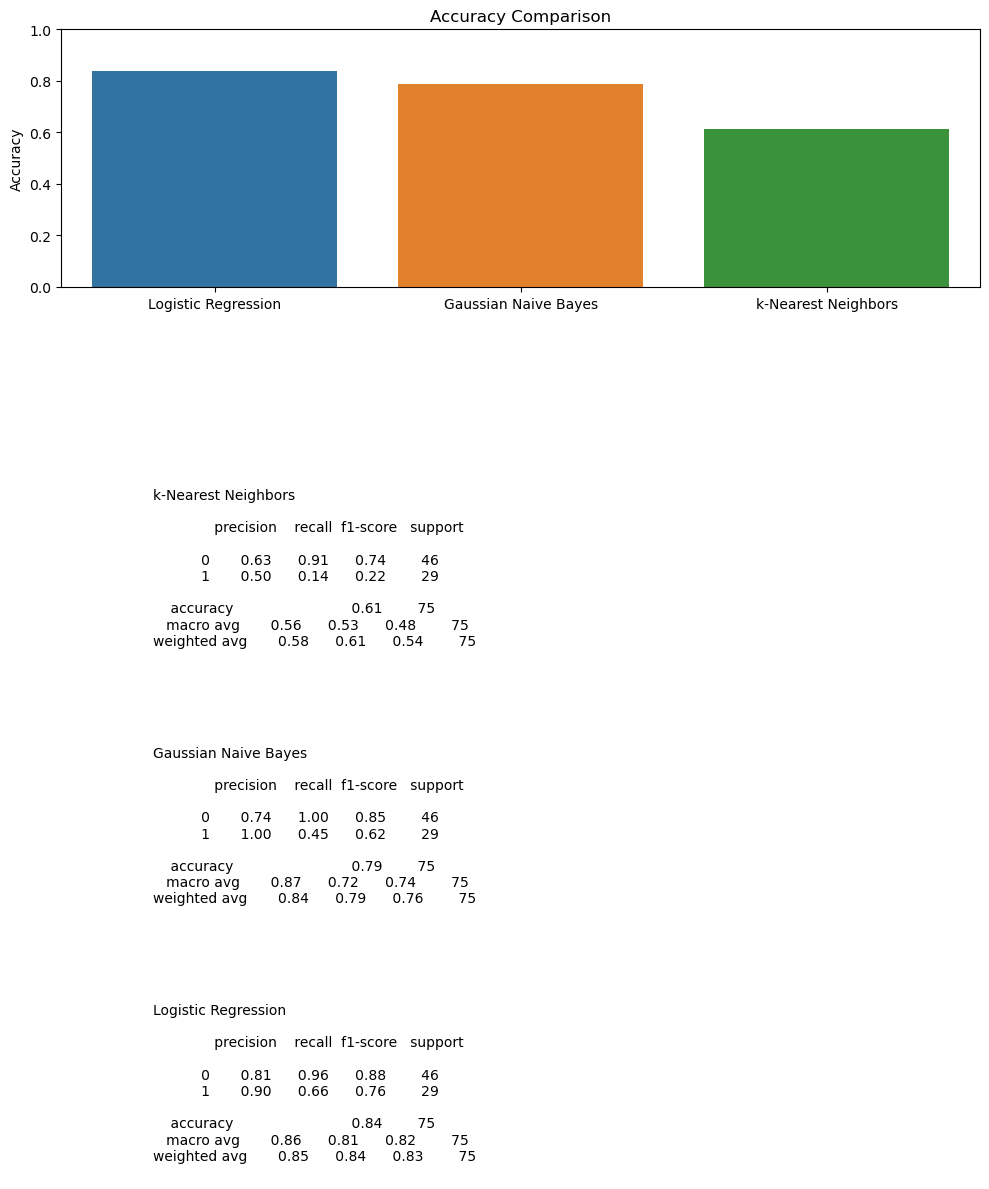

In [255]:
models = ['Logistic Regression', 'Gaussian Naive Bayes', 'k-Nearest Neighbors']
accuracies = [accuracy_logistic_regre, accuracy_naive_bayes, accuracy_knn]
classification_reports = [report_logistic_regre, report_naive_bayes, report_knn]

# Creating a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot accuracy
sns.barplot(x=models, y=accuracies, ax=ax1)
ax1.set_title('Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)

# Plotting classification reports all together
for i, report in enumerate(classification_reports):
    ax2.text(0.1, i, f'{models[i]}\n\n{report}', fontsize=10, va='center', ha='left')

ax2.axis('off')
plt.tight_layout()

# Show the plot
plt.show()

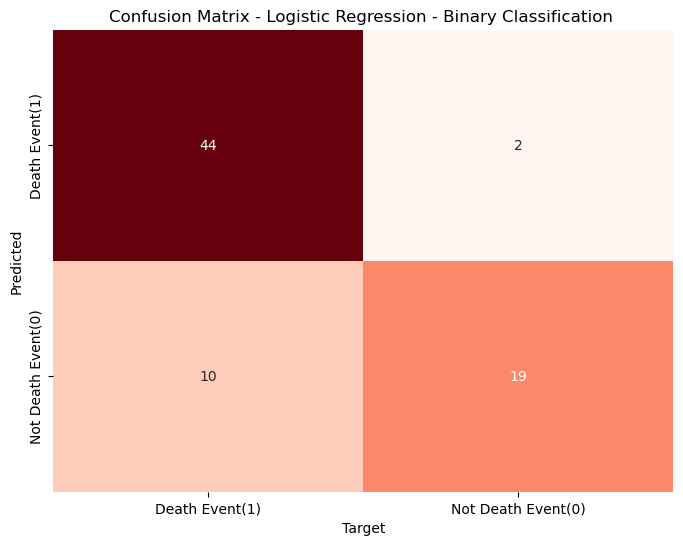

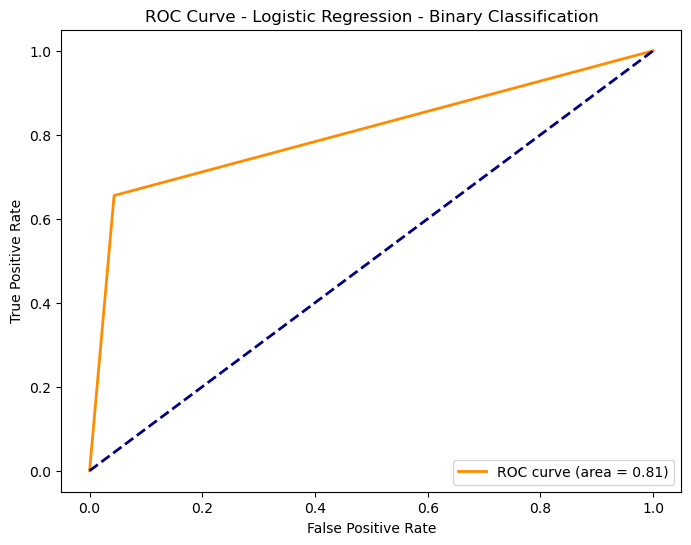

In [263]:
# Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(Y_test, Y_pred_logistic_regre)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Death Event(1)', 'Not Death Event(0)'],
            yticklabels=['Death Event(1)', 'Not Death Event(0)'])
plt.xlabel('Target')
plt.ylabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression - Binary Classification ')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_logistic_regre)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression - Binary Classification')
plt.legend(loc="lower right")
plt.show()

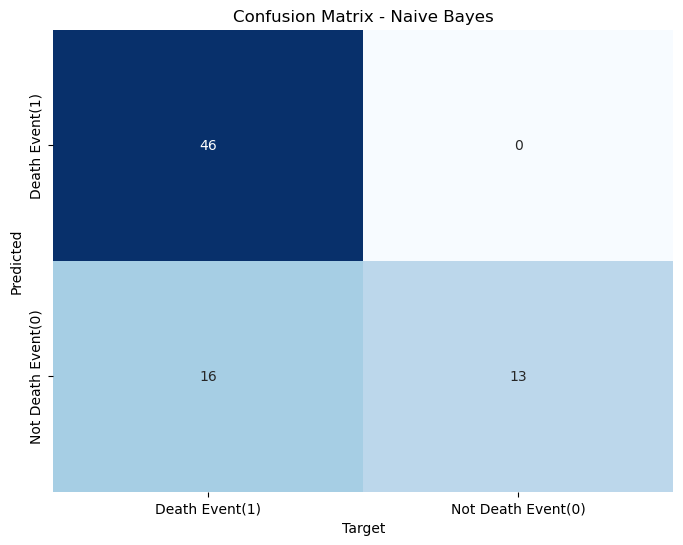

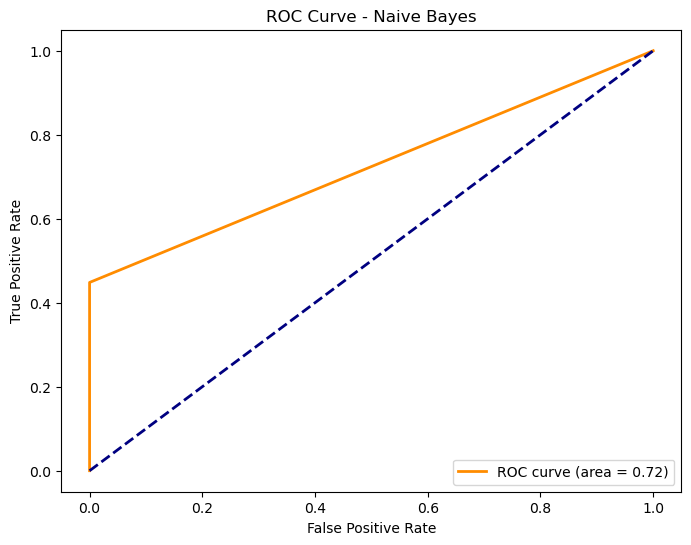

In [258]:
# Confusion Matrix for Naive Bayes
conf_matrix = confusion_matrix(Y_test, Y_pred_naive_bayes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Death Event(1)', 'Not Death Event(0)'],
            yticklabels=['Death Event(1)', 'Not Death Event(0)'])
plt.xlabel('Target')
plt.ylabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_naive_bayes)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

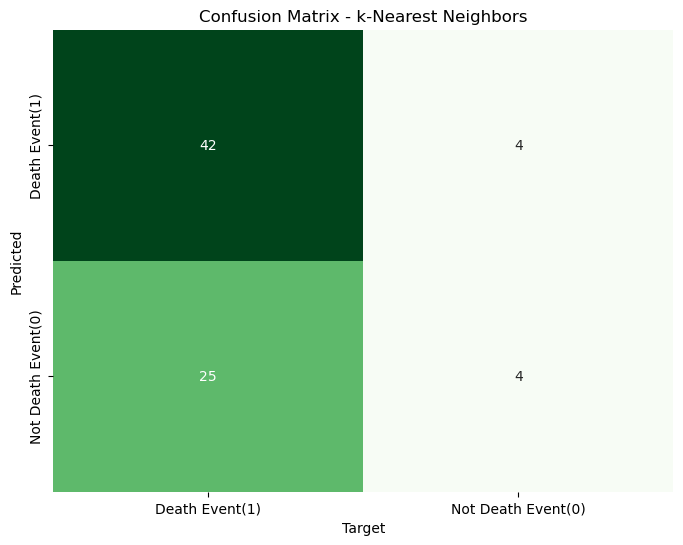

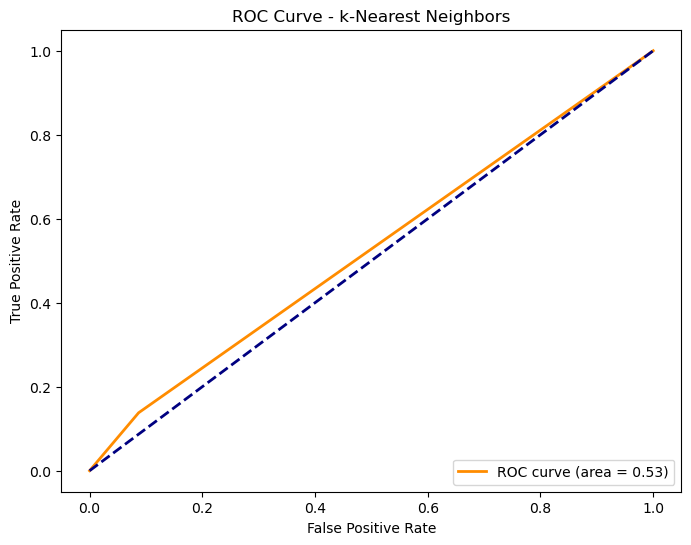

In [259]:
# Confusion Matrix for k-Nearest Neighbors
conf_matrix = confusion_matrix(Y_test, Y_pred_knn)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Death Event(1)', 'Not Death Event(0)'],
            yticklabels=['Death Event(1)', 'Not Death Event(0)'])
plt.xlabel('Target')
plt.ylabel('Predicted')
plt.title('Confusion Matrix - k-Nearest Neighbors')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_knn)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - k-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()

## 3.5. Discuss the suitability of each classification method for identifying patients at risk.

### In terms of accuracy, logistic regression performed the best among the three models with an accuracy score of 84%, while the k-nearest neighbor model had the lowest score. The confusion matrix shows that the logistic regression model has a low number of false negative instances and can predict at-risk patients (True Positive) more accurately. The ROC curve shows that the model can cover at least 0.81, which is indicative of good separability. A perfect classifier has an AUC value close to 1, which means it can separate classes very well. Although not perfect, the logistic regression model is better than the other models. 

### The Naive Bayes model comes in second with an accuracy score of 79% and an ROC curve score of 0.72. On the other hand, the k-nearest neighbor model has a lower accuracy score and ROC curve value of 0.53. When AUC is around 0.5, it means that the model cannot separate classes at all. This indicates that the k-nearest neighbor model is less effective in identifying patients at risk of 'DEATH_EVENT' compared to the logistic regression model, which can predict at-risk patients at an 80% rate.

### When it comes to identifying patients at risk, Logistic Regression and naive Bayes are the two models with the highest confidence. These models tend to be quite accurate in their classification of patients. On the other hand, k-nearest neighbors may require additional work to improve its accuracy and classification score, which not be suited for production ready.

# Conclusion: Summarize the findings and insights from the clustering, regression, and classification analyses. Discuss the clinical relevance of the results and how each technique contributes to mortality prediction in cardiovascular medicine.

### The clustering analysis identified distinct patient groups with varying mortality rates. K-means clustering showed that patients in cluster ‘2’ had the highest mortality rate, while cluster ‘1’ had the lowest. Kernel K-means clustering showed that cluster ‘1’ had a 100% mortality rate, but this result was based on a small sample size. EM clustering showed that cluster ‘0’ had the highest mortality rate, while clusters ‘1’ and ‘2’ had similar rates.

### The regression analysis using linear and ridge regression models showed that both models had low Mean Squared Error(MSE) scores, but the individual models' scores were less than 50%. Linear regression may not perform well if the assumption of a linear relationship between the independent and dependent variables is invalid. Ridge regression can help stabilize the model and reduce overfitting, but the results obtained were less desirable.

### The classification analysis using logistic regression, Naive Bayes, and k-nearest neighbor models showed that logistic regression had the highest accuracy score and could predict at-risk patients (True Positive) more accurately. The Naive Bayes model came in second, while the k-nearest neighbor model had the lowest accuracy score.

### The clinical relevance of these findings is that different techniques can yield different results and contribute to mortality prediction in cardiovascular medicine. Clustering analysis can help identify distinct patient groups and their mortality rates, allowing for more personalized treatments. Regression analysis can help predict mortality rates based on selected and impactful patient characteristics, while classification analysis can help identify patients at risk of death. By combining these techniques, healthcare providers can make more informed decisions about patient care and improve outcomes.